In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.date_range("16/12/25","2/2/26",freq='D')

DatetimeIndex(['2025-12-16', '2025-12-17', '2025-12-18', '2025-12-19',
               '2025-12-20', '2025-12-21', '2025-12-22', '2025-12-23',
               '2025-12-24', '2025-12-25', '2025-12-26', '2025-12-27',
               '2025-12-28', '2025-12-29', '2025-12-30', '2025-12-31',
               '2026-01-01', '2026-01-02', '2026-01-03', '2026-01-04',
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-10', '2026-01-11', '2026-01-12',
               '2026-01-13', '2026-01-14', '2026-01-15', '2026-01-16',
               '2026-01-17', '2026-01-18', '2026-01-19', '2026-01-20',
               '2026-01-21', '2026-01-22', '2026-01-23', '2026-01-24',
               '2026-01-25', '2026-01-26', '2026-01-27', '2026-01-28',
               '2026-01-29', '2026-01-30', '2026-01-31', '2026-02-01',
               '2026-02-02'],
              dtype='datetime64[ns]', freq='D')

# time delta

represent a duration

In [3]:
diff=pd.Timedelta("2 days 10 hour 36 minute 45 second")
diff

Timedelta('2 days 10:36:45')

In [4]:
t1=pd.Timestamp("2/1/25 10:00")
t2=pd.Timestamp("2/2/25")
t2-t1

Timedelta('0 days 14:00:00')

In [5]:
t2+diff

Timestamp('2025-02-04 10:36:45')

In [6]:
pd.date_range("16/12/25","20/12/25",freq='D')+diff

DatetimeIndex(['2025-12-18 10:36:45', '2025-12-19 10:36:45',
               '2025-12-20 10:36:45', '2025-12-21 10:36:45',
               '2025-12-22 10:36:45'],
              dtype='datetime64[ns]', freq='D')

In [43]:
df=pd.read_csv("tesla.csv")
df["Date"]=pd.to_datetime(df["Date"],utc=True)
df.set_index("Date",drop=True,inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 04:00:00+00:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 04:00:00+00:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 04:00:00+00:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 04:00:00+00:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 04:00:00+00:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [45]:
df_2025_June=df.loc["2025-06"]
df_2025_June

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-02 04:00:00+00:00,343.500000,348.019989,333.329987,342.690002,81873800,0.0,0.0
2025-06-03 04:00:00+00:00,346.600006,355.399994,343.040009,344.269989,99324500,0.0,0.0
2025-06-04 04:00:00+00:00,345.100006,345.600006,327.329987,332.049988,98912100,0.0,0.0
2025-06-05 04:00:00+00:00,322.489990,324.549988,273.209991,284.700012,287499800,0.0,0.0
2025-06-06 04:00:00+00:00,298.829987,305.500000,291.140015,295.140015,163824100,0.0,0.0


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

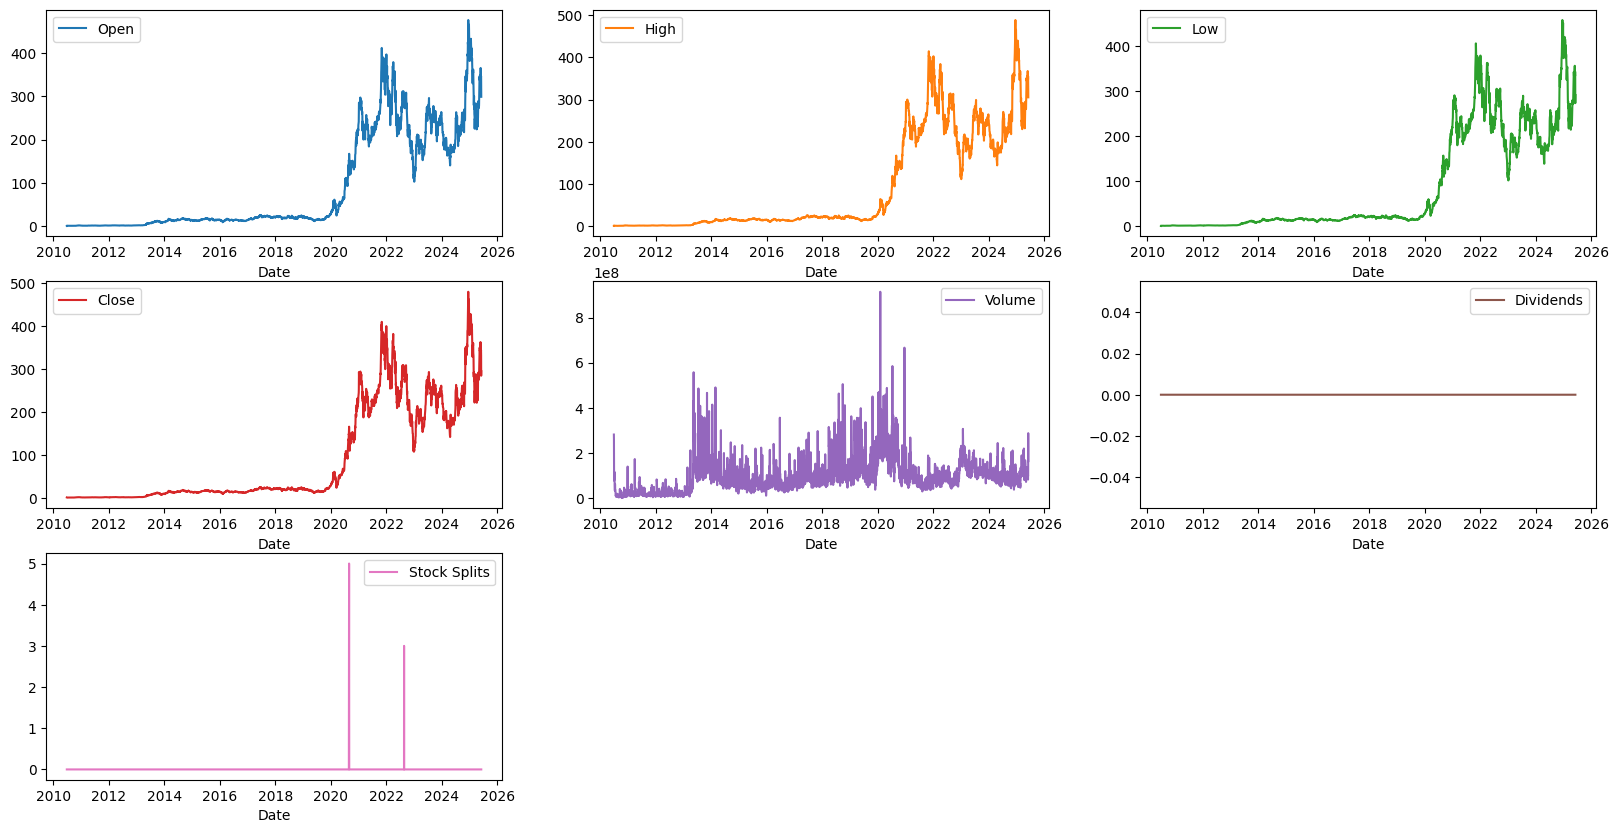

In [54]:
df.plot(subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(20,10))

<Axes: xlabel='Date'>

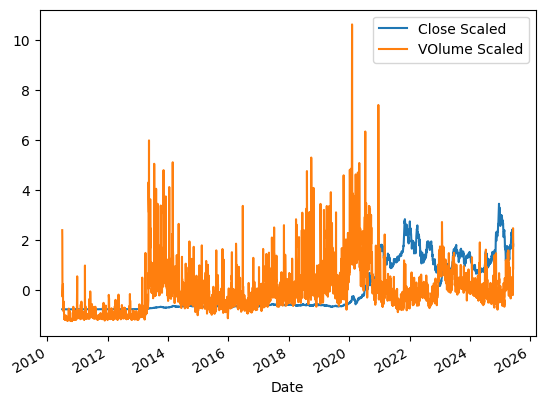

In [57]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
df["Close Scaled"]=std.fit_transform(df[["Close"]])
df["VOlume Scaled"]=std.fit_transform(df[["Volume"]])

df[["Close Scaled","VOlume Scaled"]].plot()

In [58]:
df.asfreq("D")  # it will give output as of freq d and fill the missing col as Nan values

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Scaled,VOlume Scaled
Date,,,,,,,,,
2010-06-29 04:00:00+00:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0,-0.763383,2.397536
2010-06-30 04:00:00+00:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,-0.763418,2.089648
2010-07-01 04:00:00+00:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0,-0.764517,0.341148
2010-07-02 04:00:00+00:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0,-0.766139,-0.259147
2010-07-03 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-02 04:00:00+00:00,343.500000,348.019989,333.329987,342.690002,81873800.0,0.0,0.0,2.243341,-0.197060
2025-06-03 04:00:00+00:00,346.600006,355.399994,343.040009,344.269989,99324500.0,0.0,0.0,2.257268,0.029757
2025-06-04 04:00:00+00:00,345.100006,345.600006,327.329987,332.049988,98912100.0,0.0,0.0,2.149550,0.024397


In [59]:
df.asfreq("B")  # it will give output as of freq of buisness days and fill the missing col as Nan values

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Scaled,VOlume Scaled
Date,,,,,,,,,
2010-06-29 04:00:00+00:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0,-0.763383,2.397536
2010-06-30 04:00:00+00:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,-0.763418,2.089648
2010-07-01 04:00:00+00:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0,-0.764517,0.341148
2010-07-02 04:00:00+00:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0,-0.766139,-0.259147
2010-07-05 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-02 04:00:00+00:00,343.500000,348.019989,333.329987,342.690002,81873800.0,0.0,0.0,2.243341,-0.197060
2025-06-03 04:00:00+00:00,346.600006,355.399994,343.040009,344.269989,99324500.0,0.0,0.0,2.257268,0.029757
2025-06-04 04:00:00+00:00,345.100006,345.600006,327.329987,332.049988,98912100.0,0.0,0.0,2.149550,0.024397


In [61]:
df.asfreq("M")  # it will give output as of freq M and fill the missing col as Nan values

C:\Users\panka\AppData\Local\Temp\ipykernel_12412\430549731.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.asfreq("M")  # it will give output as of freq M and fill the missing col as Nan values


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Scaled,VOlume Scaled
Date,,,,,,,,,
2010-06-30 04:00:00+00:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,-0.763418,2.089648
2010-07-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-31 04:00:00+00:00,1.310667,1.319333,1.288667,1.298667,3016500.0,0.0,0.0,-0.765975,-1.222018
2010-09-30 04:00:00+00:00,1.466667,1.476667,1.346000,1.360667,32937000.0,0.0,0.0,-0.765428,-0.833123
2010-10-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-01-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-28 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-31 04:00:00+00:00,249.309998,260.559998,243.360001,259.160004,134008900.0,0.0,0.0,1.507036,0.480573


In [62]:
df.asfreq("Q")  # it will give output as of freq M and fill the missing col as Nan values

C:\Users\panka\AppData\Local\Temp\ipykernel_12412\3878890089.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.asfreq("Q")  # it will give output as of freq M and fill the missing col as Nan values


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Scaled,VOlume Scaled
Date,,,,,,,,,
2010-06-30 04:00:00+00:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,-0.763418,2.089648
2010-09-30 04:00:00+00:00,1.466667,1.476667,1.346000,1.360667,32937000.0,0.0,0.0,-0.765428,-0.833123
2010-12-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31 04:00:00+00:00,1.770000,1.914000,1.766667,1.850000,172767000.0,0.0,0.0,-0.761115,0.984336
2011-06-30 04:00:00+00:00,1.900000,1.955333,1.893333,1.942000,14200500.0,0.0,0.0,-0.760304,-1.076653
2011-09-30 04:00:00+00:00,1.653333,1.659333,1.566000,1.626000,20041500.0,0.0,0.0,-0.763089,-1.000734
2011-12-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-30 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df[df["Stock Splits"]!=0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Scaled,VOlume Scaled
Date,,,,,,,,,
2020-08-31 04:00:00+00:00,148.203339,166.713333,146.703339,166.106674,355123200,0.0,5.0,0.686784,3.354535
2022-08-25 04:00:00+00:00,302.359985,302.959991,291.600006,296.070007,53230000,0.0,3.0,1.832392,-0.569362


In [68]:
df.loc["2020-09-1"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Scaled,VOlume Scaled
Date,,,,,,,,,
2020-09-01 04:00:00+00:00,167.380005,167.496674,156.83667,158.350006,269523300,0.0,0.0,0.61841,2.241939


In [86]:
df["Month"]=df.index.month_name()


<Axes: xlabel='Month'>

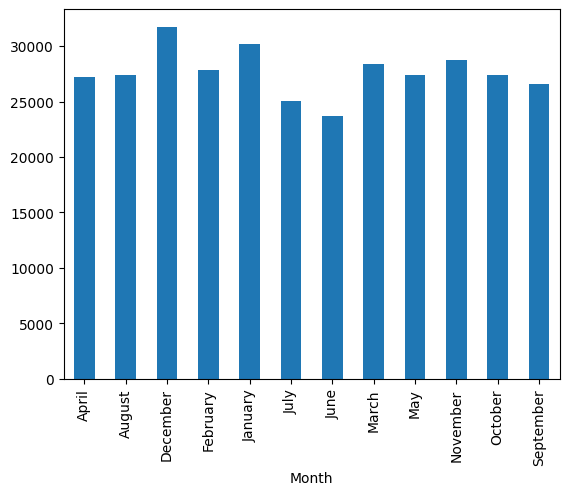

In [91]:
df.groupby("Month")["Close"].sum().plot(kind='bar')

#Resampling

1-DownSampling - when we decrease frequency of the samples like minutes to hours 

2-UpSampling - when we increase frequency of the samples like  hours to minutes 

<Axes: xlabel='Date'>

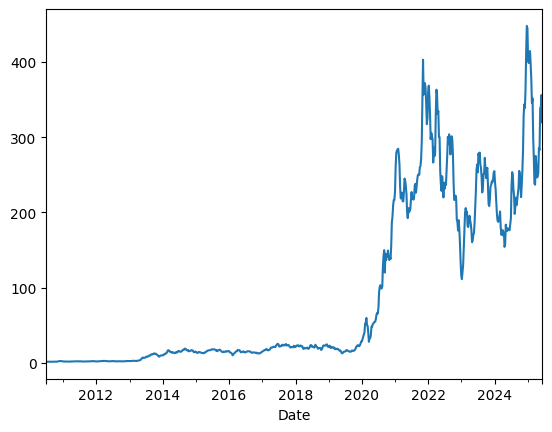

In [99]:
# downsampling

# after doing it like we convert days to week so now we can place new columns values as their mean ,median etc 
# it is done when there is a lot of noise or lot of sample in data which makes it difficult to analyas a trend in 

df["Close"].resample("W").mean().plot()

In [101]:
# Up sampling

# after increaseing sample we get a lot of nan values to fill them we have to specify method like linear etc

df["Close"].resample("H").interpolate(method="linear")
df["Close"].resample("H").interpolate(method="spline",order=2) # a polynomial with degree 2

C:\Users\panka\AppData\Local\Temp\ipykernel_12412\3357606956.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Close"].resample("H").interpolate(method="linear")


Date
2010-06-29 04:00:00+00:00      1.592667
2010-06-29 05:00:00+00:00      1.592500
2010-06-29 06:00:00+00:00      1.592334
2010-06-29 07:00:00+00:00      1.592167
2010-06-29 08:00:00+00:00      1.592000
                                ...    
2025-06-06 00:00:00+00:00    293.400014
2025-06-06 01:00:00+00:00    293.835014
2025-06-06 02:00:00+00:00    294.270014
2025-06-06 03:00:00+00:00    294.705015
2025-06-06 04:00:00+00:00    295.140015
Freq: h, Name: Close, Length: 130945, dtype: float64

# Rolling Average

it helps in smoothning the curve

for eg - data - 1,2,3,4,5,6  and rolling window=3 then new values
                nan,nan,(3+2+1)/3,(4+3+2)/3,(5+4+3)/3,(6+5+4)/3

exponentially weighted rolling avg 

data points are weighted exponentially i.e latest points are weighted more

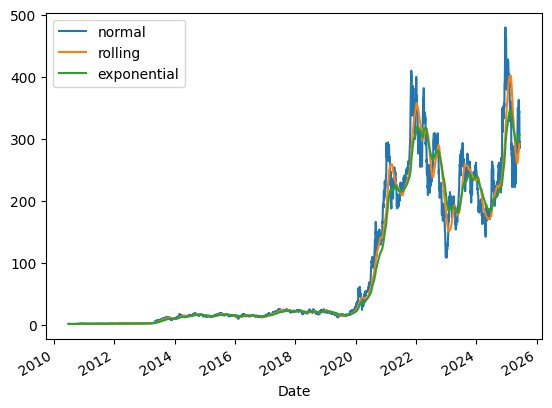

In [115]:
df["Close"].plot(label="normal")
df["Close"].rolling(50).mean().plot(label="rolling")
df["Close"].ewm(50).mean().plot(label="exponential")
plt.legend()

# shift

it shift values of given column by given no of times

In [117]:
df["Close"]

Date
2010-06-29 04:00:00+00:00      1.592667
2010-06-30 04:00:00+00:00      1.588667
2010-07-01 04:00:00+00:00      1.464000
2010-07-02 04:00:00+00:00      1.280000
2010-07-06 04:00:00+00:00      1.074000
                                ...    
2025-06-02 04:00:00+00:00    342.690002
2025-06-03 04:00:00+00:00    344.269989
2025-06-04 04:00:00+00:00    332.049988
2025-06-05 04:00:00+00:00    284.700012
2025-06-06 04:00:00+00:00    295.140015
Name: Close, Length: 3759, dtype: float64

In [116]:
df["Close"].shift(1)

Date
2010-06-29 04:00:00+00:00           NaN
2010-06-30 04:00:00+00:00      1.592667
2010-07-01 04:00:00+00:00      1.588667
2010-07-02 04:00:00+00:00      1.464000
2010-07-06 04:00:00+00:00      1.280000
                                ...    
2025-06-02 04:00:00+00:00    346.459991
2025-06-03 04:00:00+00:00    342.690002
2025-06-04 04:00:00+00:00    344.269989
2025-06-05 04:00:00+00:00    332.049988
2025-06-06 04:00:00+00:00    284.700012
Name: Close, Length: 3759, dtype: float64

In [118]:
df["Close"].shift(-1)

Date
2010-06-29 04:00:00+00:00      1.588667
2010-06-30 04:00:00+00:00      1.464000
2010-07-01 04:00:00+00:00      1.280000
2010-07-02 04:00:00+00:00      1.074000
2010-07-06 04:00:00+00:00      1.053333
                                ...    
2025-06-02 04:00:00+00:00    344.269989
2025-06-03 04:00:00+00:00    332.049988
2025-06-04 04:00:00+00:00    284.700012
2025-06-05 04:00:00+00:00    295.140015
2025-06-06 04:00:00+00:00           NaN
Name: Close, Length: 3759, dtype: float64